# The Use of Matrices in Computer Graphics
### By Shahzeb Khan
For Professor Philley's Linear Algebra class.

In [1]:
%matplotlib inline
import numpy as np

from pylab import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Let's initialize a square box shape called `box`. Here we are just defining the coordinates needed to make the box. Important to note that computers draw their grid system slightly different than we are use to. The origin `(0,0)` is located at the top left. The y-axis increases positively downwards. The x-axis is unchanged. Another change in computer graphics is that coordinates are written `(y,x)`/`(n,m)` instead of `(x,y)`/`(m,n)`. Both of these changes are a result of monitors conventionally drawing graphics from the top left downward.

In [2]:
# Define the coordinates that make up our box shape in the format of (y,x)
box = np.array([[5,5],
                [6,5],
                [5,6],
                [6,6]])

Let's go ahead and define a function called `drawShape` which can draw any coordinates onto a grid which is similar to our monitor's. Let's also define a function called `getImageMatrix` which takes any shape matrix and returns a `(10,10)` matrix where everything is 0 except the pixels which create the shape are set to 1.

In [3]:
def drawShape(coordinates):
    """Draws an image and returns a matrix of that image"""
    figure(1)
    imshow(coordinates, interpolation='nearest')
    grid(False)
    
def getImageMatrix(shape, size=10):
    """Return a (10,10) matrix which contains 1's for the shape"""
    matrix = np.zeros((size, size),dtype=np.int16)
    for i in shape:
        matrix[i[0]][i[1]] = 1
    return matrix

Now we can run the `boxShape` function to draw the image while passing in our earlier defined box as the shape we would like to draw:

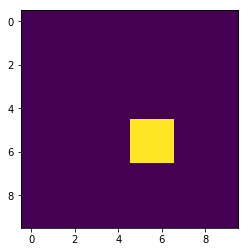

In [4]:
boxMatrix = getImageMatrix(box)
drawShape(boxMatrix)

Now that we have drawn the image using the `drawShape` function, we have also set the variable `boxMatrix` to be the matrix representation of this image. Let's take a look:

In [5]:
print(boxMatrix)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Notice how every element of the matrix is set to 0 with the exception of 1's appearing at every location that we decided to 'turn on' our box pixels. Now, let's try multiplying this `boxMatrix` with the identity matrix of `[1,0],[0,1]`. We will draw out the result of the matrix multiplication:

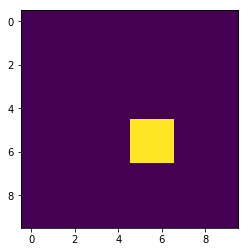

In [8]:
identity = np.array([[1,0], # Where the identity matrix is defined
                     [0,1]]) 
identityMul = np.matmul(box, identity) # 
boxMatrix2 = getImageMatrix(identityMul)
drawShape(boxMatrix2)

Exactly as we expected, we got back the same box at the same location as ealier. But what happens when we do a matrix multiplication by `[1,1],[0,1]` instead?

In [ ]:
rotation = np.array([[1,1], # Where the new matrix is defined
                     [0,1]]) 
rotationMul = np.matmul(box, rotation)
boxMatrix3 = getImageMatrix(rotationMul, 15)
drawShape(boxMatrix3)

Though this looks strange, if we print out the contents of the new matrix which has been multiplied by `[1,1],[0,1]`, we can see that a rotation has taken place (refer to the matrix below). One shortcoming of displaying boxes as our pixels is that this rotation doesn't look smooth. Older television's and video game systems (such as the Atari) employed a technique known as anti-aliasing to smooth out the graphics. 

In [ ]:
print(boxMatrix3)

Notice where the `1's` are now. We have successfully achived a slight rotation and movement on the 'pixels' of our box. But now, we are going to need a better way to represent our pixels. Instead of adding boxes to our image, we will plot lines (vectors). These lines will act exactly how vector graphics function. Let's go ahead and define the vertices of a shape that resembles the letter "F":

In [ ]:
fShape = np.array([[0,0],
                   [1,0],
                   [1,2],
                   [2,2],
                   [2,3],
                   [1,3],
                   [1,4],
                   [3,4],
                   [3,5],
                   [0,5],
                   [0,0]])

https://stackoverflow.com/questions/12864294/adding-an-arbitrary-line-to-a-matplotlib-plot-in-ipython-notebook

From here on out, we'll go back to the familiar plot that we know of where the x-axis and y-axis are back to being w

In [ ]:
last = [0,0]
# for i in fShape:
#     print('Adding', i)
#     plt.plot(last, i, 'k-') # last coord, current
#     last = i
    
plt.plot([0, 0], [0, 8], 'k-') # (x1,x2) (y1,y2)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()